# How does the world food and feed production correlate with annual population?



World annual food/feed dataset courtesy: Who eats the food we grow? from Kaggle by Dor Oppenheim (https://www.kaggle.com/dorbicycle/world-foodfeed-production)

World annual population dataset courtesy: World population from Kaggle by Alexander Shakhov (https://www.kaggle.com/centurion1986/world-population)


1. Understanding world food/feed production data
1(a). Summary
1(b). Who are the largest and least food and feed producers in the world?
1(c). How does annual food and feed production per year changes with year? -- Plot annual food + feed production per year as a function of year. 
    How to deal with missing values in the dataset? 
    (i) Drop it: Drop all rows with any one missing value
    (ii) Fill it: Fit to data and transform missing values as per fitted data
2.  How does world food and feed production relate to world population per annum?


In [16]:
import pandas as pd
import numpy as np 

FAO_1 = pd.read_csv("FAO.csv", encoding = "ISO-8859-1") #FAO.csv is the World annual food/feed dataset
FAO_1.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [26]:
print(FAO_1.columns)
print("#rows:", FAO_1.shape[0], "#columns: ", FAO_1.shape[1])
print("#dimensions:", FAO_1.ndim)

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
#rows: 21477 #columns:  63
#dimensions: 2


In [27]:
FAO_1.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


pandas describe() ignores NAN entries and thus the count of columns from Y1961 to Y2011 is less than the actual number of rows provided by shape method (21477) --> Here is the summary (and plot to see the trend) of total # of NAN's in the dataset per year. All the columns contain null data except columns (index: 0-9 and 62-62).

Area Abbreviation       0
Area Code               0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Unit                    0
latitude                0
longitude               0
Y1961                3539
Y1962                3539
Y1963                3539
Y1964                3539
Y1965                3539
Y1966                3539
Y1967                3539
Y1968                3539
Y1969                3539
Y1970                3539
Y1971                3539
Y1972                3539
Y1973                3539
Y1974                3539
Y1975                3539
Y1976                3539
Y1977                3539
Y1978                3539
Y1979                3539
Y1980                3539
                     ... 
Y1984                3539
Y1985                3539
Y1986                3539
Y1987                3539
Y1988                3539
Y1989                3539
Y1990                3415
Y1991       

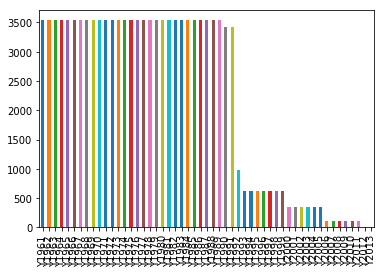

In [69]:
print(FAO_1[5:].isnull().sum())
FAO_1.loc[:,"Y1961":"Y2013"].isnull().sum().plot.bar()

1(b). Understanding the data: Who are the largest and least food and feed producers in the world?
create a subdataframe which contains the annual food + feed production per country.

In [55]:
Total = FAO_1.groupby(['Area','Element']).sum()
Total = Total.loc[:, 'Y1961':] #reducing the number of columns to include only years from 1961 - 2013

Total.rename(columns=lambda x: x[1:], inplace=True) #drop 'y" in col names
Total = round(Total,2) 
Total.sort_index(inplace=True)

Largest food producer in the world from 1961 to 2013

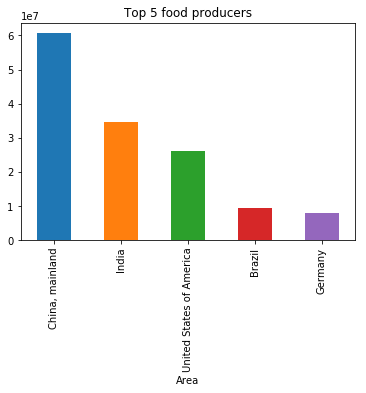

In [56]:
Total.xs('Food', level='Element').sum(axis=1).nlargest(5).plot.bar(title = "Top 5 food producers")

Largest feed producer in the world from 1961 to 2013

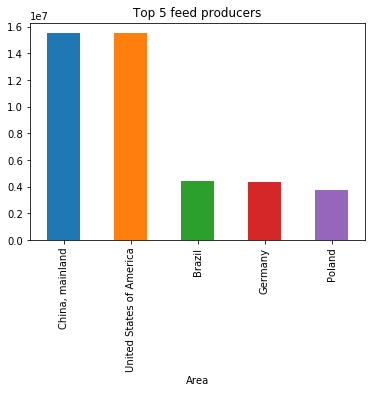

In [4]:
Total.xs('Feed', level='Element').sum(axis=1).nlargest(5).plot.bar(title = "Top 5 feed producers")

Least food producer in the world from 1961 to 2013

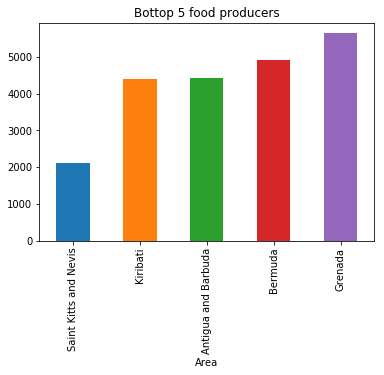

In [58]:
Total.xs('Food', level='Element').sum(axis=1).nsmallest(5).plot.bar(title = "Bottop 5 food producers")

Least feed producer in the world from 1961 to 2013

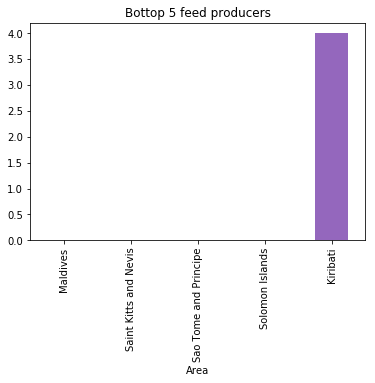

In [59]:
Total.xs('Feed', level='Element').sum(axis=1).nsmallest(5).plot.bar(title = "Bottop 5 feed producers")

1(c). How does annual food and feed production per year changes with year?
Dealing with missing values 
    (i) Drop all rows with any one missing value

In [60]:
Total_dropna_all = FAO_1.dropna(axis = 0, how='any')
Total_dropna_all = Total_dropna_all.groupby('Area').sum()

Dealing with missing values (ii) Fit to data and transform missing values

In [74]:
from sklearn.preprocessing import Imputer

#Create numpy array to be imported
FAO_2btransformed = FAO_1[FAO_1.columns[10:]].values
FAO_transformed = Imputer(axis=0).fit_transform(FAO_2btransformed)
#test = pd.DataFrame(FAO_transformed)
FAO_2 = FAO_1.copy(deep = True)
FAO_2.iloc[:,10:] = FAO_transformed
print(FAO_2.isnull().sum()) # Cross verify to check for null values


Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Unit                 0
latitude             0
longitude            0
Y1961                0
Y1962                0
Y1963                0
Y1964                0
Y1965                0
Y1966                0
Y1967                0
Y1968                0
Y1969                0
Y1970                0
Y1971                0
Y1972                0
Y1973                0
Y1974                0
Y1975                0
Y1976                0
Y1977                0
Y1978                0
Y1979                0
Y1980                0
                    ..
Y1984                0
Y1985                0
Y1986                0
Y1987                0
Y1988                0
Y1989                0
Y1990                0
Y1991                0
Y1992                0
Y1993                0
Y1994                0
Y1995                0
Y1996      

# World food and feed production per year: Comparison of raw data, data with missing values removed and transformed
#No. of missing values and number of zeros in original dataset are shown for reference

([<matplotlib.axis.XTick at 0x1a1e38de48>,
 <a list of 11 Text xticklabel objects>)

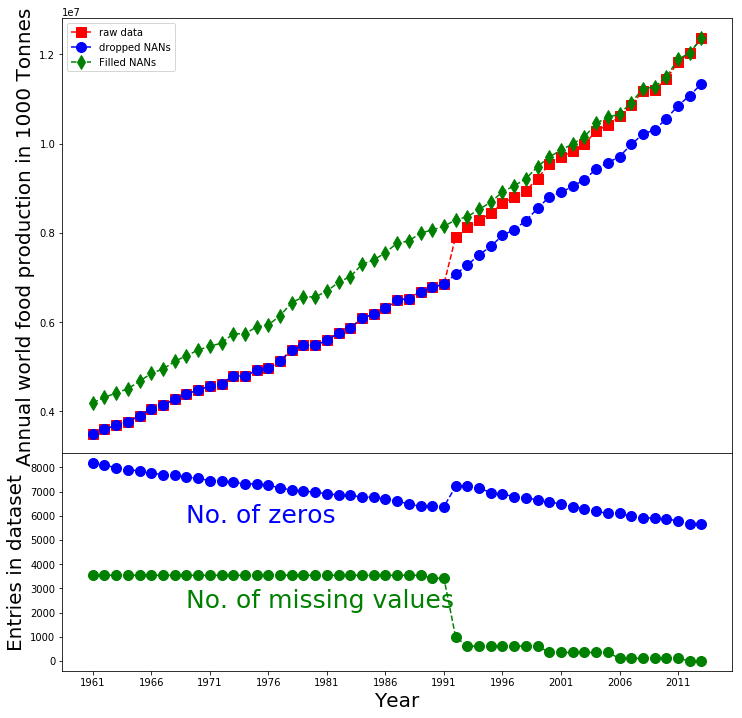

In [94]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

matplotlib.rcParams.update({'font.size': 10})

x = Total.columns

fig = plt.figure(1, figsize= (12,12))
gridspec.GridSpec(3,1)
plt.subplot2grid((3,1), (0,0),  rowspan=2, colspan =2)
plt.plot(x,Total.sum(axis=0), markersize = 10, color = 'red', marker = 's',linestyle = '--', label = 'raw data')
plt.plot(x,Total_dropna_all.iloc[:,5:].sum(axis=0), markersize = 10, color = 'blue', marker = 'o',linestyle = '--', label = 'dropped NANs')
plt.plot(x,FAO_2.iloc[:,10:].sum(axis=0), markersize = 10, color = 'g', marker = 'd',linestyle = '--', label = 'Filled NANs')
plt.ylabel("Annual world food production in 1000 Tonnes", fontsize = 20)
plt.legend()

FAO_null_series = FAO_1.isnull().sum() #No. of NANs in original data set
plt.subplot2grid((3,1), (2,0))
plt.plot(x,FAO_null_series[10:], markersize = 10, color = 'green', marker = 'o',linestyle = '--')

FAO_zero_series = (FAO_1 == 0).sum() #No. of zeros in original data set
plt.plot(x,FAO_zero_series[10:], markersize = 10, color = 'blue', marker = 'o', linestyle = '--')

plt.ylabel("Entries in dataset", fontsize = 20, wrap = True)
plt.xlabel("Year", fontsize = 20)

plt.subplots_adjust(hspace=.0)
plt.annotate("No. of zeros", xy=(8,5700), color = 'blue', size = 25)
plt.annotate("No. of missing values", xy=(8,2200), color = 'green', size = 25)
plt.xticks(x[::5], x[::5])
 

Total annual food + feed production increases linearly with every year (linear regression on this time series to be included soon).

# How does world food and feed production relate to world population per annum?

Summary of world population dataset

In [98]:
world_pop = pd.read_csv("WorldPopulation.csv", encoding = "ISO-8859-1")
world_pop.head()

,"ÈÀ""Country""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [100]:
print(world_pop.columns)
print("Rows and columns: ", world_pop.shape)

Index(['ÈÀ"Country"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')
Rows and columns:  (217, 61)


World food and feed geneeration dataset has data only for 174 countries in the year range 1961 - 2013 whereas world population has data for additional countries and years (217 countries for year range 1960 - 2016). Thus, this dataset will be filtered for better comparison.

In [101]:
#Import population dataset and compare with food and feed production

world_pop = world_pop.rename(columns = {'\x95ÈÀ"Country"':'Area', 'Indicator Name': 'Element'}) # Renaming column name
world_pop.set_index(['Area', 'Element'], inplace = True)

#World pop dataset has 217 countries while Total dataset has only 174 countries
#Append population data from world pop dataset to Total dataset

Population_Filter = world_pop.sort_index()
Population_Filter = Population_Filter.iloc[:,3:-3]

cmn_index = (Total.index.levels[0]) & (world_pop.index.levels[0])
Food_pop = Total.append(Population_Filter.loc[list(cmn_index)])
Food_pop.sort_index(inplace=True)


[Text(0,0,'1961'),
 Text(0,0,'1966'),
 Text(0,0,'1971'),
 Text(0,0,'1976'),
 Text(0,0,'1981'),
 Text(0,0,'1986'),
 Text(0,0,'1991'),
 Text(0,0,'1996'),
 Text(0,0,'2001'),
 Text(0,0,'2006'),
 Text(0,0,'2011')]

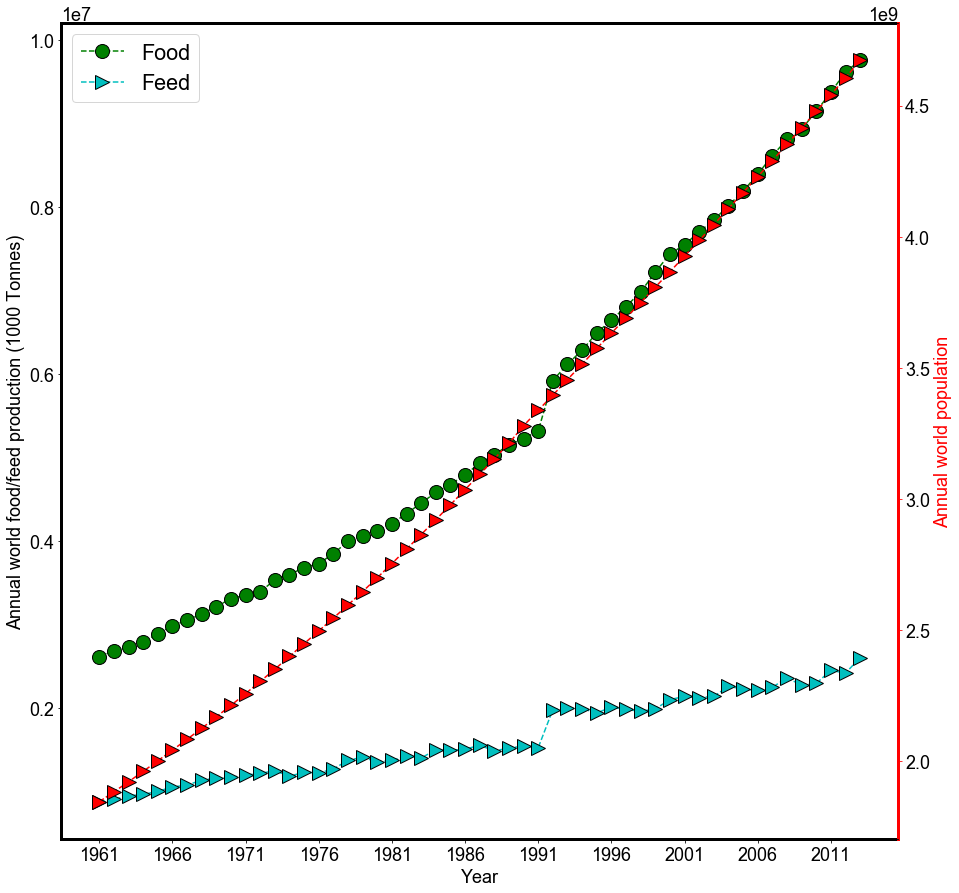

In [103]:
#Plot total food, feed and population as a function of years

matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':'large', 'figure.titlesize':'medium', 'font.family': 'Arial'})


x2 = Food_pop.columns

fig, ax1 = plt.subplots(figsize = (15,15), sharex = True)
# Total food
ax1.plot(x2,Food_pop.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food')
# Total feed
ax1.plot(x2,Food_pop.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed')
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual world food/feed production (1000 Tonnes)", color = 'black')
ax1.tick_params('y', color = 'black')
for axis in ['left', 'bottom', 'top']:
    ax1.spines[axis].set_linewidth(3)
ax1.legend()


ax2 = ax1.twinx()
#Annual world population
ax2.plot(x2,Food_pop.xs('Population, total', level='Element').sum(axis=0), markersize = 14, color = 'r', marker = '>',linestyle = '--', mec = 'black' , label = 'World Annual population')
ax2.set_ylabel("Annual world population", color = 'red')
ax2.tick_params('y', color = 'red')
ax1.set_xticks(list(x2[::5]))
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(3)
ax1.xaxis.set_ticklabels(list(x2[::5]))

Correlation between population and total food production

[Text(0,0,'1961'),
 Text(0,0,'1966'),
 Text(0,0,'1971'),
 Text(0,0,'1976'),
 Text(0,0,'1981'),
 Text(0,0,'1986'),
 Text(0,0,'1991'),
 Text(0,0,'1996'),
 Text(0,0,'2001'),
 Text(0,0,'2006'),
 Text(0,0,'2011')]

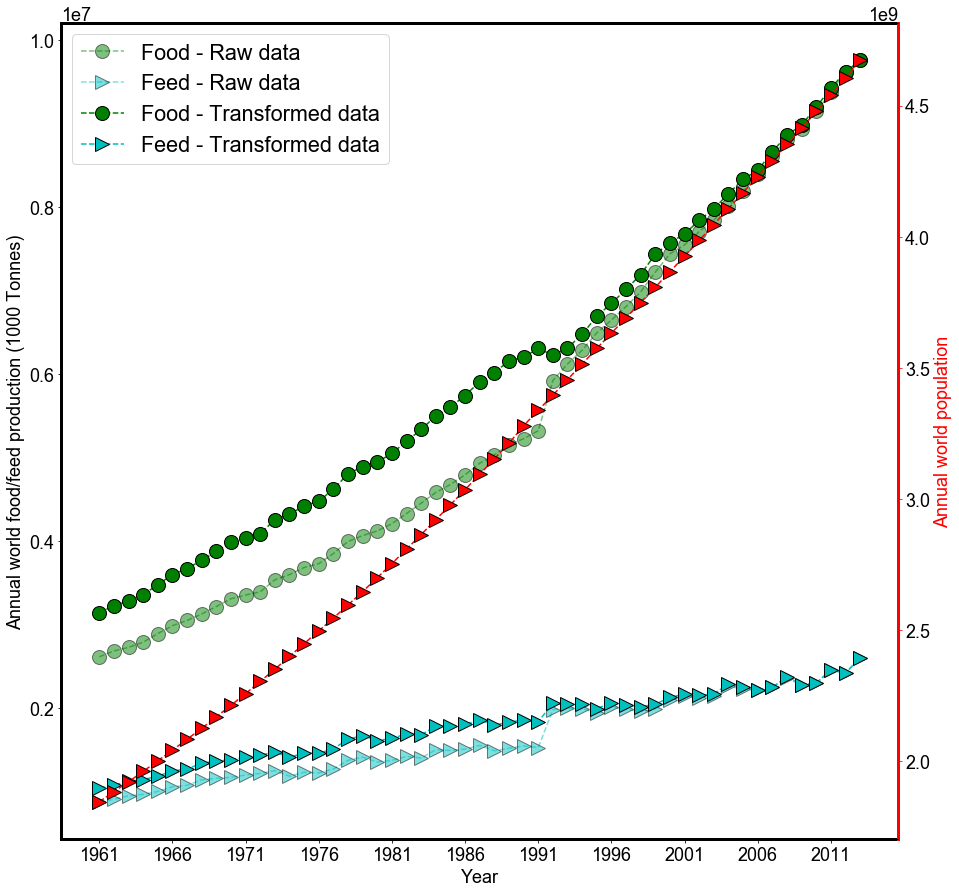

In [104]:
#Missing values in FAO_2 is transformed. FAO_2 will be used for this analysis

Transformed_total = FAO_2.copy(deep = True)
Transformed_total = Transformed_total.groupby(['Area','Element']).sum()
Transformed_total = Transformed_total.loc[:, 'Y1961':]
Transformed_total.rename(columns=lambda x: x[1:], inplace=True) #drop 'y" in col names

#World pop dataset has 217 countries while Total dataset has only 174 countries
#Append population data from world pop dataset to Total dataset

ind = list(Transformed_total.index.levels[0] & world_pop.index.levels[0])

Food_pop_transformed=Transformed_total.append(Population_Filter.loc[ind])
Food_pop_transformed.sort_index(inplace = True)

# Plot

x3 = Food_pop_transformed.columns

fig, ax1 = plt.subplots(figsize = (15,15), sharex = True)

# Total raw food
ax1.plot(x3,Food_pop.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food - Raw data', alpha = 0.5)
# Total raw feed
ax1.plot(x3,Food_pop.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed - Raw data', alpha = 0.5)
# Total transformed food 
ax1.plot(x3,Food_pop_transformed.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food - Transformed data')
# Total transformed feed
ax1.plot(x3,Food_pop_transformed.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed - Transformed data')
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual world food/feed production (1000 Tonnes)", color = 'black')
ax1.tick_params('y', color = 'black')
for axis in ['left', 'bottom', 'top']:
    ax1.spines[axis].set_linewidth(3)
ax1.legend()


ax2 = ax1.twinx()
#Annual world population
ax2.plot(x3,Food_pop_transformed.xs('Population, total', level='Element').sum(axis=0), markersize = 14, color = 'r', marker = '>',linestyle = '--', mec = 'black' , label = 'World Annual population')
ax2.set_ylabel("Annual world population", color = 'red')
ax2.tick_params('y', color = 'red')
ax1.set_xticks(list(x3[::5]))
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(3)
ax1.xaxis.set_ticklabels(list(x3[::5]))
